In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import kurtosis as scipy_kurtosis 

# Load Data
Load Half-Hourly UK System Cashout Prices.

Data Source: https://www.nordpoolgroup.com/historical-market-data/

In [2]:
# From URL
file_path = 'https://www.nordpoolgroup.com/48cd48/globalassets/marketdata-excel-files/n2ex-day-ahead-auction-prices_2018_hourly_gbp.xls'

# Or From File
#file_path = '../data/nordpool/n2ex-day-ahead-auction-prices_2018_hourly_gbp.xls'

In [3]:
files=[
"n2ex-day-ahead-auction-prices_2013_hourly_gbp.xls",
"n2ex-day-ahead-auction-prices_2014_hourly_gbp.xls",
"n2ex-day-ahead-auction-prices_2015_hourly_gbp.xls",
"n2ex-day-ahead-auction-prices_2016_hourly_gbp.xls",
"n2ex-day-ahead-auction-prices_2017_hourly_gbp.xls",
"n2ex-day-ahead-auction-prices_2018_hourly_gbp.xls",
"n2ex-day-ahead-auction-prices_2019_hourly_gbp.xls",
"n2ex-day-ahead-auction-prices_2020_hourly_gbp.xls",
]

In [4]:
root = "../data/nordpool/"

paths = [root+file for file in files]
paths

['../data/nordpool/n2ex-day-ahead-auction-prices_2013_hourly_gbp.xls',
 '../data/nordpool/n2ex-day-ahead-auction-prices_2014_hourly_gbp.xls',
 '../data/nordpool/n2ex-day-ahead-auction-prices_2015_hourly_gbp.xls',
 '../data/nordpool/n2ex-day-ahead-auction-prices_2016_hourly_gbp.xls',
 '../data/nordpool/n2ex-day-ahead-auction-prices_2017_hourly_gbp.xls',
 '../data/nordpool/n2ex-day-ahead-auction-prices_2018_hourly_gbp.xls',
 '../data/nordpool/n2ex-day-ahead-auction-prices_2019_hourly_gbp.xls',
 '../data/nordpool/n2ex-day-ahead-auction-prices_2020_hourly_gbp.xls']

In [5]:
def read(filepath):
    # Load
    raw_list = pd.read_html(filepath, decimal=',')
    df = raw_list[0]
    
    return df

In [6]:
def parse(df):
    ### Format Data

    # Name Columns
    df.columns = ['date','hour_UK','hour_EU','price']

    # Format Date Column
    df.date = pd.to_datetime(df.date, format='%d-%m-%Y')

    # Format Hour Columns
    df.hour_UK = df.hour_UK.str.slice(stop = 2)
    df.hour_UK = pd.to_numeric(df.hour_UK)
    df.hour_EU = df.hour_EU.str.slice(stop = 2)
    df.hour_EU = pd.to_numeric(df.hour_EU)

    # Convert Price to GBP
    df.price = df.price/100

    # Check NA values
    nan_value_count = df.isna().any(axis=1).sum()
    na_df = df.loc[df.isna().any(axis=1)]
    #df.price.isna().sum()

    print(f"NaN values count: {nan_value_count}")
    print(f"NaN values table:")
    display(na_df)
    
    return df

### Parse and Merge 

In [7]:
frames=[]

for path in paths:
    
    dff = parse(read(path))
    
    frames.append(dff)

NaN values count: 1
NaN values table:


,date,hour_UK,hour_EU,price
2138,2013-03-31,1,2,NaN


NaN values count: 1
NaN values table:


,date,hour_UK,hour_EU,price
2114,2014-03-30,1,2,NaN


NaN values count: 1
NaN values table:


,date,hour_UK,hour_EU,price
2090,2015-03-29,1,2,NaN


NaN values count: 1
NaN values table:


,date,hour_UK,hour_EU,price
2066,2016-03-27,1,2,NaN


NaN values count: 1
NaN values table:


,date,hour_UK,hour_EU,price
2018,2017-03-26,1,2,NaN


NaN values count: 1
NaN values table:


,date,hour_UK,hour_EU,price
1994,2018-03-25,1,2,NaN


NaN values count: 1
NaN values table:


,date,hour_UK,hour_EU,price
2138,2019-03-31,1,2,NaN


NaN values count: 1
NaN values table:


,date,hour_UK,hour_EU,price
2114,2020-03-29,1,2,NaN


In [8]:
df = pd.concat(frames)

In [9]:
dates=pd.date_range(datetime(2013,1,1), datetime(2020,10,20))

print('Length:', len(df))
print('Expected Length:', len(dates)*24)

Length: 68407
Expected Length: 68400


In [10]:
# Save Result
#df.to_csv(root+'2013_to_oct_2022.csv')


All Data Histogram:


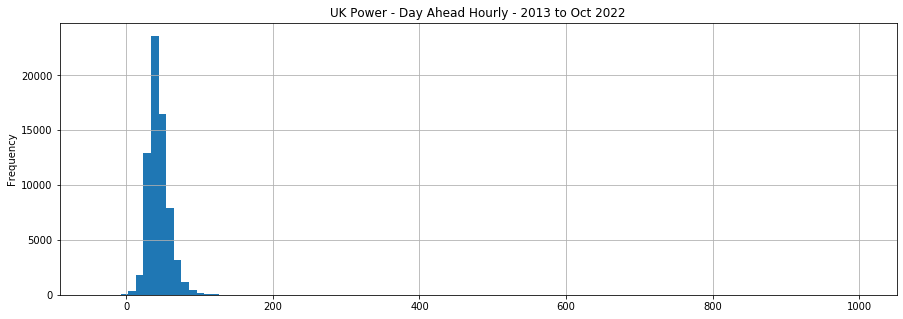

Histogram (values above 100£):


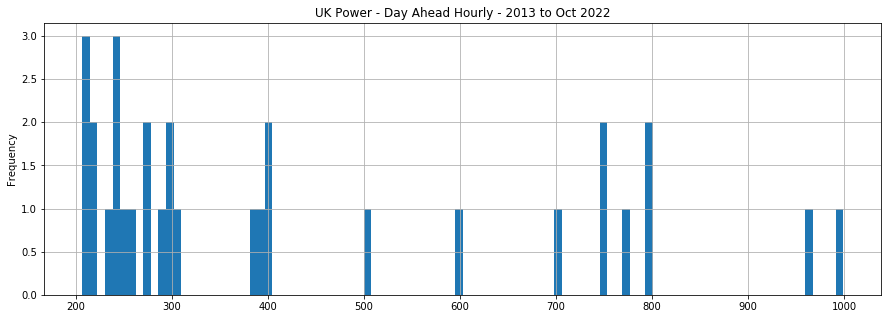

,count,mean,std,min,25%,50%,75%,max
price,68399,44,17,-38,34,41,51,999


Mean Absolute Deviation: 11

Hours above 500£:


,hour_UK,price
date,,
2016-09-15,19,999
2016-09-15,20,799
2016-09-19,18,750
2016-09-19,19,960
2016-09-19,20,747
2016-11-07,17,796
2016-11-08,17,775
2016-11-09,17,600
2016-11-14,17,700


In [11]:
# Print and Plot a summary
title='UK Power - Day Ahead Hourly - 2013 to Oct 2022'
print('\nAll Data Histogram:')
df.price.plot.hist(bins=100, grid=True, figsize=[15,5], title=title);
plt.show()

print('Histogram (values above 100£):')
ax = df.loc[df.price>200].price.plot.hist(bins=100, grid=True, figsize=[15,5], title=title);
plt.show()

display(df.price.describe().to_frame().T.astype(int))

print('Mean Absolute Deviation:', round(df.price.mad()))

# List Hours above 500£
print('\nHours above 500£:')
display(df.set_index('date').loc[df.set_index('date').price>500].drop(columns=['hour_EU']).astype(int))